# Part 3. Tensorflow tutorial - Image segmentation

### Goal of this tutorial:
###     Build and train a model which segments aorta in CT images

## (1) Labelling train images

In [ ]:
# Create ground-truth mask image on Slicer software

In [1]:

import nibabel as nb 
import numpy as np

import matplotlib.pyplot as plt
import os
import pandas as pd 
import cv2 

#from keras.models import Sequential
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import tensorflow as tf
%matplotlib inline

In [14]:

for dirname, _, filenames in os.walk('./aorta-ct-scans'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
root, dirs, files

root : dir과 files가 있는 path
dirs : root 아래에 있는 폴더들
files : root 아래에 있는 파일들
'''

./aorta-ct-scans\aorta_metadata.csv
./aorta-ct-scans\CT (51).nii
./aorta-ct-scans\ct_segmentation_result.csv
./aorta-ct-scans\Segmentation (51).nii
./aorta-ct-scans\local_ct_data\0000\CT0.nii
./aorta-ct-scans\local_ct_data\0000\PET.nii
./aorta-ct-scans\local_ct_data\0000\Segmentation.nii
./aorta-ct-scans\local_ct_data\0001\CT1.nii
./aorta-ct-scans\local_ct_data\0001\Segmentation.nii
./aorta-ct-scans\local_ct_data\0002\CT2.nii
./aorta-ct-scans\local_ct_data\0002\Segmentation.nii
./aorta-ct-scans\local_ct_data\0003\CT3.nii
./aorta-ct-scans\local_ct_data\0003\Segmentation.nii
./aorta-ct-scans\local_ct_data\0004\CT4.nii
./aorta-ct-scans\local_ct_data\0004\Segmentation.nii
./aorta-ct-scans\local_ct_data\0005\CT5.nii
./aorta-ct-scans\local_ct_data\0005\Segmentation.nii
./aorta-ct-scans\local_ct_data\0006\CT6.nii
./aorta-ct-scans\local_ct_data\0006\Segmentation.nii
./aorta-ct-scans\local_ct_data\0007\CT7.nii
./aorta-ct-scans\local_ct_data\0007\Segmentation.nii
./aorta-ct-scans\local_ct_data\0

./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10072.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10073.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10074.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10075.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10076.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10077.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10078.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10079.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10080.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10081.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10082.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10083.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0286353c\CT\10084.dcm

'\nroot, dirs, files\n\nroot : dir과 files가 있는 path\ndirs : root 아래에 있는 폴더들\nfiles : root 아래에 있는 파일들\n'

In [15]:
data=pd.read_csv("./aorta-ct-scans/ct_segmentation_result.csv")
data

,data_file,segmentation_file
0,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
1,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
2,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
3,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
4,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
5,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
6,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
7,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
8,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...
9,./aorta-ct-scans/train/local_ct_total_data/CT ...,./aorta-ct-scans/train/local_segmentation_tota...


In [16]:
CT_scans=data["data_file"]
Mask_scan=data["segmentation_file"]


In [21]:
def read_ct(path):
    image=nb.load(path)#image=해당경로의 각종데이터
    print("image =")
    print(image)
    array=image.get_fdata()#araay=image에서 어레이부분만 가져오기
    array=np.rot90(np.array(array,dtype=np.float32))#array정제
    return array



In [22]:
read_ct(CT_scans[0])

image =
<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 299)
affine: 
[[-1.17187500e+00  0.00000000e+00  0.00000000e+00  3.00000000e+02]
 [ 0.00000000e+00 -1.17187500e+00  0.00000000e+00  3.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  3.26999998e+00 -1.04595996e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 299   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       1.171875 1.171875 3.27     0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_

array([[[-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        ...,
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.]],

       [[-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        ...,
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.]],

       [[-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        [-3024., -3024., -3024., ..., -3024., -3024., -3024.],
        ...,
        [-30

In [19]:
window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}

(512, 512, 299)
(512, 512, 299)


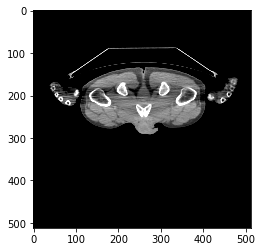

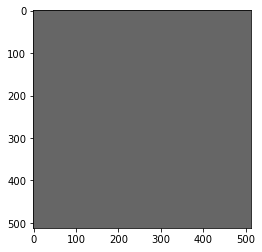

In [20]:
img=read_ct(CT_scans[0])
mask=read_ct(Mask_scan[0])
print(img.shape)
print(mask.shape)
plt.imshow(img[...,24], cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])
plt.figure()
plt.imshow(mask[...,24],cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

In [ ]:
mask가 안보임->numpy형식으로 해보기

In [11]:
CT = []
Mask = []
img_size = 64


for case in range(len(data)): #Concat all cases to list
    ct = read_ct(CT_scans[case])
    mask = read_ct(Mask_scan[case])
    
    for imgsize in range(ct.shape[0]):        
        ct_img = cv2.resize(ct[imgsize], dsize = (img_size, img_size),interpolation = cv2.INTER_AREA).astype('uint8')
        mask_img = cv2.resize(mask[imgsize],dsize=(img_size, img_size),interpolation = cv2.INTER_AREA).astype('uint8')
        CT.append(ct_img[np.newaxis,...])
        Mask.append(mask_img[np.newaxis,...])

In [12]:
CT=np.array(CT)
Mask=np.array(Mask)
mins = CT.min(axis=(1,2,3), keepdims=True)
maxs = CT.max(axis=(1,2,3), keepdims=True)
norm_data = (CT-mins)/(maxs-mins)
print(CT.shape)
print(Mask.shape)
#CT=CT.swapaxes(1,3)

(26112, 1, 64, 64)
(26112, 1, 64, 64)


## (2) Define train/validation set

In [13]:
class CT_dataset(keras.utils.Sequence):
    def __init__(self, CT,Mask):
        self.ct_scans =CT
        self.mask_scan = Mask

    def __len__(self):
        return len(self.ct_scans)

    def __getitem__(self, idx):
        ct=self.ct_scans[idx]
        masks=self.mask_scan[idx]
        return ct,masks


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(norm_data,Mask,test_size=0.2,random_state=42)

In [15]:
##임의수정 x_train,x_test,y_train,y_test
x_train=x_train.swapaxes(1,3)
y_train=y_train.swapaxes(1,3)
x_test=x_test.swapaxes(1,3)
y_test=y_test.swapaxes(1,3)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20889, 64, 64, 1)
(20889, 64, 64, 1)
(5223, 64, 64, 1)
(5223, 64, 64, 1)


In [17]:
train_dataset=CT_dataset(x_train,y_train)
test_dataset=CT_dataset(x_test,y_test)

In [18]:
import numpy as np
import math
from tensorflow.keras.utils import Sequence

class Dataloader(Sequence):

    def __init__(self, x_set, y_set, batch_size, shuffle=False):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.shuffle=shuffle
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

		# batch 단위로 직접 묶어줘야 함
    def __getitem__(self, idx):
				# sampler의 역할(index를 batch_size만큼 sampling해줌)
        indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]

        batch_x = [self.x[i] for i in indices]
        batch_y = [self.y[i] for i in indices]

        return np.array(batch_x), np.array(batch_y)

    # epoch이 끝날때마다 실행
    def on_epoch_end(self):
        self.indices = np.arange(len(self.x))
        if self.shuffle == True:
            np.random.shuffle(self.indices)
            

train_dl = Dataloader(x_train,y_train, 4, shuffle=True)
valid_dl = Dataloader(x_test,y_test, 1, shuffle=False)


(400, 1, 64, 64)
(400, 1, 64, 64)


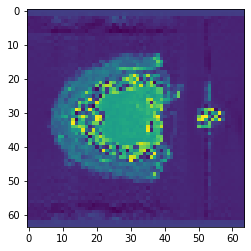

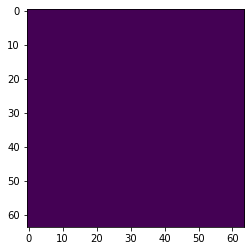

In [24]:
image,label=train_dataset[:400]
image=image.swapaxes(1,3)
label=label.swapaxes(1,3)
print(image.shape)
print(label.shape)
plt.imshow(image[300].squeeze(0))
plt.figure()
plt.imshow(label[300].squeeze(0))

## (3) Build and train a model

### Method 1 : U-Net

In [62]:
# U-Net : https://arxiv.org/abs/1505.04597
# input shape = output shape : (batch_size, 512, 512, 1)

def unet():
    # encoding + decoding layer with skip connection
    # Fully convolutional network without dense layer 
    # FCN : https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf
    
    # tf.keras.layers.Conv2D
    # tf.keras.layers.MaxPool2D
    # tf.keras.layers.BatchNormalization
    # tf.keras.layers.ReLu
    # tf.keras.layers.Conv2DTranspose or tf.keras.layers.UpSampling2D + tf.keras.layers.Conv2D
    # tf.concat
    # Sigmoid activation at last layer
    
    ...
    ...
    
    return model

In [29]:
from sklearn.model_selection import train_test_split,StratifiedKFold


from tensorflow.keras.layers import Dense, Input, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization,Add,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import LeakyReLU, ReLU, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, UpSampling2D, concatenate
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K

In [30]:
def UNet(pretrained_weights = None,input_size = (64,64,1)):
    inp = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inp)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inp, outputs=[conv10])

    return model

In [31]:
model = UNet()
model.summary()
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

C:\ProgramData\Anaconda3\envs\saynot\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [119]:
history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs = 10)

Epoch 1/10
653/653 [==============================] - 32s 46ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 9.7211e-04 - val_accuracy: 0.9998
Epoch 2/10
653/653 [==============================] - 30s 46ms/step - loss: 7.5018e-04 - accuracy: 0.9998 - val_loss: 7.4709e-04 - val_accuracy: 0.9998
Epoch 3/10
653/653 [==============================] - 30s 46ms/step - loss: 6.7570e-04 - accuracy: 0.9998 - val_loss: 7.6648e-04 - val_accuracy: 0.9998
Epoch 4/10
653/653 [==============================] - 30s 47ms/step - loss: 6.1988e-04 - accuracy: 0.9998 - val_loss: 5.8405e-04 - val_accuracy: 0.9998
Epoch 5/10
653/653 [==============================] - 30s 46ms/step - loss: 5.5157e-04 - accuracy: 0.9998 - val_loss: 5.4858e-04 - val_accuracy: 0.9998
Epoch 6/10
653/653 [==============================] - 30s 46ms/step - loss: 4.6399e-04 - accuracy: 0.9998 - val_loss: 4.8089e-04 - val_accuracy: 0.9998
Epoch 7/10
653/653 [==============================] - 30s 47ms/step - loss: 4.0170e-04 - acc

In [121]:
model.evaluate(x_test, y_test)

164/164 [==============================] - 2s 13ms/step - loss: 3.4905e-04 - accuracy: 0.9999


[0.00034905425854958594, 0.9998689293861389]

In [122]:
from keras.models import model_from_json
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [59]:
##임의수정 x_train,x_test,y_train,y_test
x_train=x_train.swapaxes(1,3)
y_train=y_train.swapaxes(1,3)
x_test=x_test.swapaxes(1,3)
y_test=y_test.swapaxes(1,3)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20889, 64, 64, 1)
(20889, 64, 64, 1)
(5223, 64, 64, 1)
(5223, 64, 64, 1)


In [67]:
training_pred = model.predict(x_train)
testing_pred = model.predict(x_test)

In [68]:
def prediction(X, y, pred, k=None):
    if k  == 'None':
        k = np.random.randint(0, len(X))

    has_mask = y[k].max() > 0

    figure, j = plt.subplots(1, 3, figsize=(20, 20))
    j[0].imshow(X[k, ..., 0])
    if has_mask:
        j[0].contour(y[i].squeeze())
    k[1].imshow(y[i].squeeze())
    k[2].imshow(pred[i].squeeze())
    if has_mask:
        k[2].contour(preds[i].squeeze())

TypeError: Invalid shape (1, 20889, 64, 64) for image data

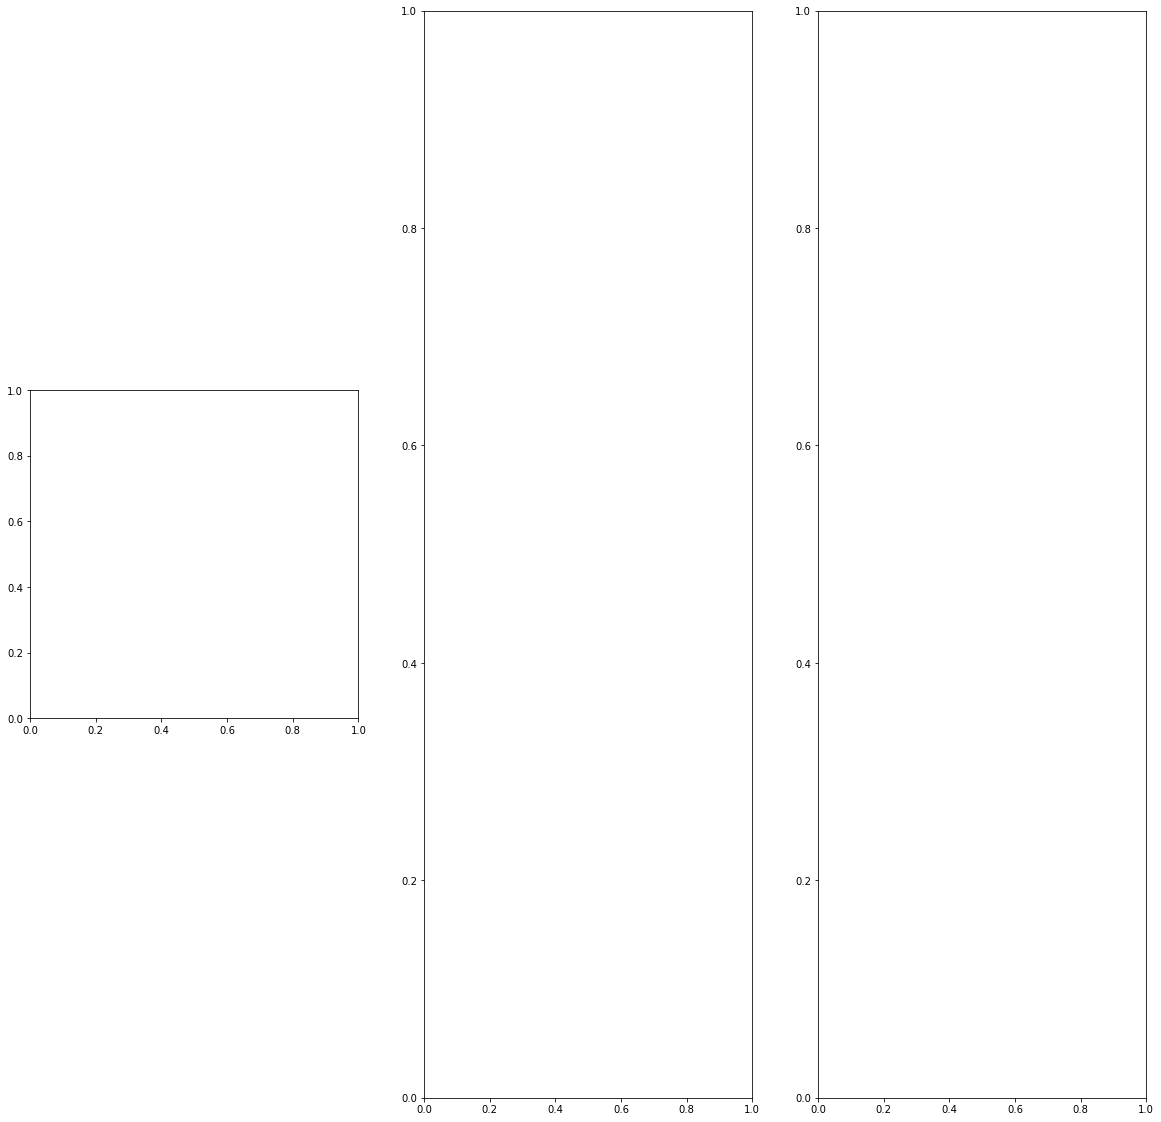

In [82]:
prediction(x_train, y_train,training_pred)

In [48]:
xhat = x_test[0:1]
yhat = model.predict(xhat)

#print(yhat)

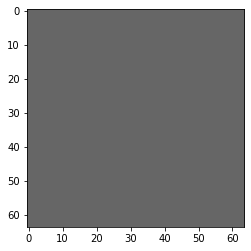

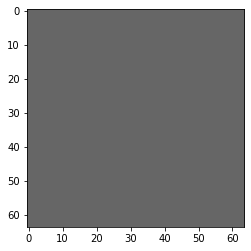

In [61]:
plt.imshow(xhat[0,...], cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])
plt.figure()
plt.imshow(yhat[0,...], cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

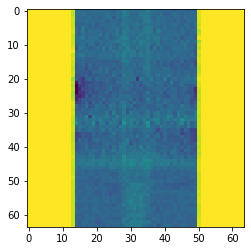

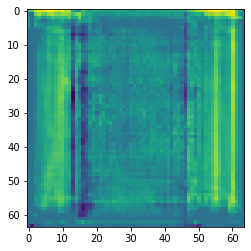

In [55]:
plt.imshow(xhat[0,...])
plt.figure()
plt.imshow(yhat[0,...])
#plt.imshow(yhat.squeeze(0))

### Method 2 : 3D U-Net

In [ ]:
# 3D Unet : https://arxiv.org/abs/1606.06650
# input shape : (batch_size, 512, 512, height, 1)

def unet_3D():
    
    # tf.keras.layers.Conv3D
    # tf.keras.layers.MaxPool3D
    # tf.keras.layers.BatchNormalization
    # tf.keras.layers.ReLu
    # tf.keras.layers.Conv3DTranspose or tf.keras.layers.UpSampling3D + tf.keras.layers.Conv3D
    # tf.concat
    # Sigmoid activation at last layer
    
    ...
    ...
    
    return model

In [ ]:
# define a optimizer/metrics and compile the model

model.compile(...)


# print summary of this model
model.summary()

In [ ]:
# Start training

model_history = model.fit(...)

## (4) Plot loss and metrics

In [ ]:
model_history.epoch
model_history.history





## (5) Predict on test set images

In [ ]:
model.predict()

## (6) Saving & loading the trained model

In [ ]:
model.save(...)

## (7) Debugging model/dataset